# ML02 Regression / Homework

The goal of this homework is to create a regression model for predicting the prices (column 'Final Price')

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# importing dataset laptops.csv

!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-08 11:38:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: 'laptops.csv.10'

laptops.csv.10      100%[===================>] 291.58K   657KB/s    in 0.4s    

2024-10-08 11:38:29 (657 KB/s) - 'laptops.csv.10' saved [298573/298573]



# Preparing the dataset

First, we'll normalize the names of the columns:

Next, use only the following columns:

'ram',
'storage',
'screen',
'final_price'

Look at the final_price variable. Does it have a long tail?

In [3]:
# setting a df for the data

df = pd.read_csv('laptops.csv')

In [4]:
# checking data

df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
# normilising column names

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
# checking outcome

df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

# Question 1

There's one column with missing values. What is it?

- 'ram'
- 'storage'
- 'screen'
- 'final_price'

In [7]:
# selecting speific columns 

df_selected = df[['ram', 'storage', 'screen', 'final_price']]

# Question 2

What's the median (50% percentile) for variable 'ram'?

- 8
- 16
- 24
- 32

In [8]:
# checking distribution and spread of each column

df_selected.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


## Review

I can already see that there are 4 missing values in 'screen' column and that the median (50%) for ram is 16

<AxesSubplot:xlabel='final_price', ylabel='Count'>

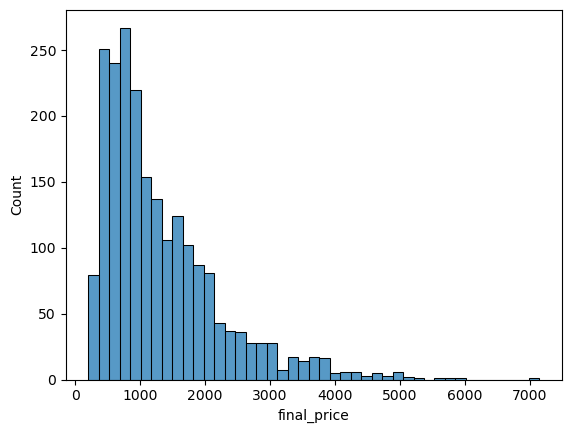

In [9]:
# checking the distribution of final_price

sns.histplot(df_selected.final_price) 

## Review

It is a right (or positively) skewed distribution with a long tail on the right side. The majority of the data points are concentrated on the left (showing lower prices), with a long tail extending to the right (higher prices)

In [10]:
# confirming the number of missing values for screen variable

df_selected.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use the same code as in the lectures

In [11]:
# defining the length of the df_selected

n = len(df_selected)
n

2160

In [12]:
# setting index df_selected using seed 42

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [13]:
# shuffling df_selected based on the shuffled index

df_selected_shuffled = df_selected.iloc[idx].reset_index(drop=True)

In [14]:
# checking outcome 

df_selected_shuffled

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
2155,8,512,15.0,1838.29
2156,8,256,15.6,531.80
2157,8,256,13.3,765.33
2158,8,512,14.0,803.61


In [15]:
# splitting the df_selected_shuffled to validation, test and train sets

n = len(df_selected_shuffled)
n_val = int(len(df_selected_shuffled) * 0.2) # 20% for validation
n_test =  int(len(df_selected_shuffled) * 0.2) # 20% for testing
n_train = int(len(df_selected_shuffled) * 0.6) # 60% for training

In [16]:
# checking if the n matches the sum of n_val, n_test and n_train

n, n_val + n_test + n_train

(2160, 2160)

In [17]:
# creating the different dfs

df_train = df_selected_shuffled.iloc[:n_train]
df_val = df_selected_shuffled.iloc[n_train:n_train+n_val]
df_test = df_selected_shuffled.iloc[n_train+n_val:]

In [18]:
# checking outcome

df_train.head(10)

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
5,16,1000,15.6,1183.68
6,16,500,14.0,1123.00
7,8,512,15.6,423.58
8,32,512,16.0,2866.16
9,32,1000,17.3,3399.99


In [19]:
# checking sizes for all datasets

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

# Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?
- Options:

    - With 0
    - With mean
    - Both are equally good

# Linear regression model / Missing values = NULL

In [20]:
# preparing data by filling missing values with 0

df_train_zero = df_train.copy() # making copy of df_train so i can implement mean strategy later 
df_train_zero['screen'] = df_train_zero['screen'].fillna(0)

df_val_zero = df_val.copy()
df_val_zero['screen'] = df_val_zero['screen'].fillna(0) # making copy of df_train so i can implement mean strategy later 

In [21]:
# setting the feature matrix X and target variable y

base = ['ram', 'storage', 'screen']
X_train_zero = df_train_zero[base].values
y_train = np.log1p(df_train_zero['final_price'].values) # applying logarithmic for model compatability

X_val_zero = df_val_zero[base].values
y_val = np.log1p(df_val_zero['final_price'].values) # applying logarithmic for model compatability

In [22]:
# setting the training in a function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
# training the model with missing values filled with NULL

w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

In [24]:
# predicting on validation set

y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

In [25]:
# calculating RMSE for missing values = 0

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse_zero = round(rmse(y_val, y_pred_zero), 2)
print(f"Validation RMSE (fill with 0): {rmse_zero}")

Validation RMSE (fill with 0): 0.43


# Linear regression model / Missing values = MEAN

In [26]:
# preparing data by filling missing values with 0

screen_mean = df_train['screen'].mean() # calculating the mean only from df_train
df_train_mean = df_train.copy()
df_train_mean['screen'] = df_train_mean['screen'].fillna(screen_mean)

df_val_mean = df_val.copy()
df_val_mean['screen'] = df_val_mean['screen'].fillna(screen_mean)

In [27]:
# setting the feature matrix X and target variable y

X_train_mean = df_train_mean[base].values

X_val_mean = df_val_mean[base].values

In [28]:
# training the model with missing values filled with mean

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [29]:
# predict on validation set

y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

In [30]:
# calculating RMSE for missing values replaced by df_train MEAN

rmse_mean = round(rmse(y_val, y_pred_mean), 2)
print(f"Validation RMSE (fill with mean): {rmse_mean}")

Validation RMSE (fill with mean): 0.43


# Review

When we are rounding to 2 decimals then both results are equal to 0.43

# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

- Options:

    - 0
    - 0.01
    - 1
    - 10
    - 100

# Trainging regularised linear regression model

In [31]:
# setting the different values of r to try

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

In [32]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Regularised matrix calculation
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # adding parameter r to the diagonal
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
# evaluating model with different r values

rmse_scores = []

for r in r_values:
    w0_ridge, w_ridge = train_linear_regression_reg(X_train_zero, y_train, r)
    y_pred_ridge = w0_ridge + X_val_zero.dot(w_ridge)
    rmse_ridge = round(rmse(y_val, y_pred_ridge), 2) # rounding the rmse to 2 decimals
    rmse_scores.append((r, rmse_ridge))
    print(f"r={r}: Validation RMSE = {rmse_ridge}")

r=0: Validation RMSE = 0.43
r=0.01: Validation RMSE = 0.43
r=0.1: Validation RMSE = 0.43
r=1: Validation RMSE = 0.43
r=5: Validation RMSE = 0.46
r=10: Validation RMSE = 0.51
r=100: Validation RMSE = 0.67


# Review

r = 0, 0.01, 0.1 and 1 are all returning RMSE = 0.43

# Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?

    - 19.176
    - 29.176
    - 39.176
    - 49.176
    
### Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

# Testing different seeds to split the data

In [34]:
# setting the different seed values to test

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
# re-defining the length of the filtered dataset

n = len(df_selected)

In [36]:
# creating a list to collect all the RMSE scores for each seed

rmse_scores_seeds = []

In [37]:
# choosing columns again to be used for the model training

base = ['ram', 'storage', 'screen']

In [38]:
# creating a loop to iterate over each seed value

for seed in seeds:
    
    # shuffling and splitting data
    
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # shuffling the dataframe
    
    df_shuffled = df_selected.iloc[idx].reset_index(drop=True)
    
    # splitting into train, validation, and test sets (60%, 20%, 20%)
    
    n_train = int(len(df_shuffled) * 0.6)
    n_val = int(len(df_shuffled) * 0.2)
    n_test = int(len(df_shuffled) * 0.2)
    
    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train + n_val]
    df_test = df_shuffled.iloc[n_train + n_val:]
    
    # filling in missing values with 0 in 'screen' as previously
    
    df_train_zero = df_train.copy()
    df_train_zero['screen'] = df_train_zero['screen'].fillna(0)
    
    df_val_zero = df_val.copy()
    df_val_zero['screen'] = df_val_zero['screen'].fillna(0)
    
    # preparing the feature matrix X and target variable y without log transformation
    
    X_train_zero = df_train_zero[base].values
    y_train = df_train_zero['final_price'].values
    
    X_val_zero = df_val_zero[base].values
    y_val = df_val_zero['final_price'].values
    
    # training the model without regularization
    
    w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
    
    # predicting on validation set
    
    y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
    
    # calculating the RMSE on the original scale
    
    rmse_zero = rmse(y_val, y_pred_zero)
    rmse_scores_seeds.append(rmse_zero)
    
    # printing the RMSE for the current seed
    
    print(f"Seed={seed}: Validation RMSE = {round(rmse_zero, 2)}")

Seed=0: Validation RMSE = 565.45
Seed=1: Validation RMSE = 636.8
Seed=2: Validation RMSE = 588.96
Seed=3: Validation RMSE = 597.81
Seed=4: Validation RMSE = 571.96
Seed=5: Validation RMSE = 573.24
Seed=6: Validation RMSE = 647.34
Seed=7: Validation RMSE = 550.44
Seed=8: Validation RMSE = 587.33
Seed=9: Validation RMSE = 576.1


In [39]:
# calculating standard deviation of all RMSE scores on the original scale

std_rmse = round(np.std(rmse_scores_seeds), 3)
print(f"Standard deviation of RMSE scores (original scale): {std_rmse}")

Standard deviation of RMSE scores (original scale): 29.176


# Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?
- Options:

    - 598.60
    - 608.60
    - 618.60
    - 628.60

# Calculating RMSE on the test dataset with seed 9

In [58]:
# handling missing values in 'screen'

df_selected['screen'] = df_selected['screen'].fillna(0)

/var/folders/k8/6mb93rb95jd6bknf4qsf29_r0000gn/T/ipykernel_99974/4015627071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['screen'] = df_selected['screen'].fillna(0)


In [59]:
# setting seed 9 in order to shuffle the dataset 

np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

In [60]:
# shuffling the df

df_shuffled = df_selected.iloc[idx].reset_index(drop=True)

In [61]:
# splitting again into train, val, and test sets (60%, 20%, 20%)

n_train = int(len(df_shuffled) * 0.6)  # First 60% for training
n_val = int(len(df_shuffled) * 0.2)    # Next 20% for validation

df_train = df_shuffled.iloc[:n_train]  # Train set (first 60%)
df_val = df_shuffled.iloc[n_train:n_train + n_val]  # Validation set (next 20%)
df_test = df_shuffled.iloc[n_train + n_val:]  # Test set (remaining 20%)

In [62]:
# combining df_train and df_val

df_train_combined = pd.concat([df_train, df_val]).reset_index(drop=True)

In [63]:
# preparing feature matrix X and target variable y

X_train_combined = df_train_combined[base].values
y_train_combined = df_train_combined['final_price'].values

X_test = df_test[base].values
y_test = df_test['final_price'].values

In [64]:
# implementing the function, adding the new parameter r for regularisation

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # regularised matrix calculation
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) # adding parameter r to the diagonal
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [65]:
# training the model with r = 0.001

r = 0.001
w0_reg, w_reg = train_linear_regression_reg(X_train_combined, y_train_combined, r)

In [66]:
# predicting on test set

y_pred_test = w0_reg + X_test.dot(w_reg)

In [67]:
# calculating RMSE on the test set

rmse_test = rmse(y_test, y_pred_test)
print(f"Test RMSE with r={r}: {round(rmse_test, 2)}")

Test RMSE with r=0.001: 608.61
